In [1]:
import pandas as pd 
import numpy as np

In [3]:
df=pd.read_csv("Mall_Customers.csv")

In [5]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [9]:
x=df.iloc[:,3:]

In [11]:
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [13]:
import matplotlib.pyplot as plt

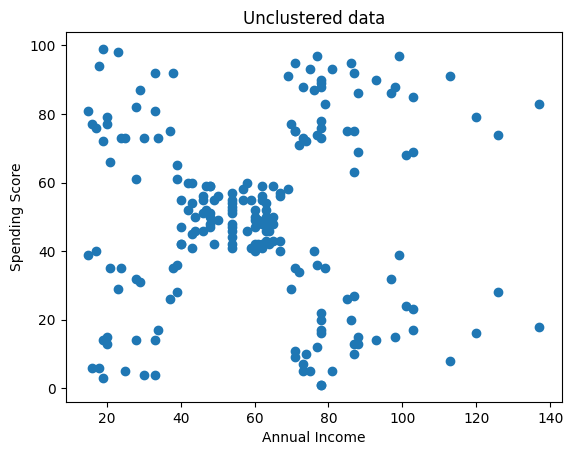

In [17]:
plt.title("Unclustered data")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.scatter(x["Annual Income (k$)"],x["Spending Score (1-100)"])

In [19]:
from sklearn.cluster import KMeans


In [21]:
sse=[]
for k in range(1,11):
    km=KMeans(n_clusters=k)
    km.fit_predict(x)
    sse.append(km.inertia_)

In [23]:
sse

[269981.28,
 186362.95600651758,
 106348.37306211119,
 73679.78903948837,
 44448.45544793371,
 37558.92202302528,
 34678.41639196044,
 26656.15964753939,
 22851.50836940837,
 22221.254019138756]

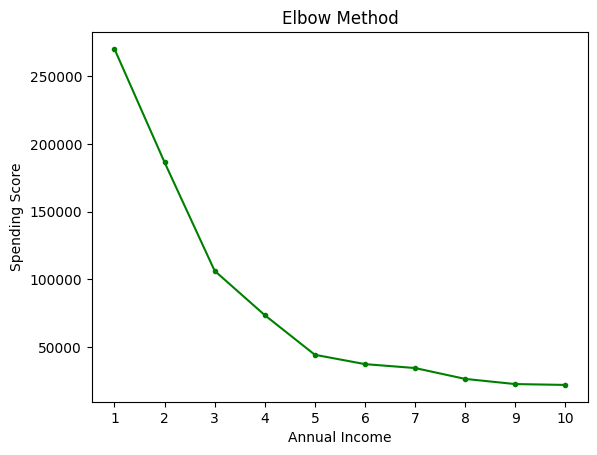

In [25]:
plt.title("Elbow Method")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.xticks(range(1,11))
plt.plot(range(1,11),sse,marker=".",color="g")

In [27]:
km= KMeans(n_clusters=5,random_state=0)

In [29]:
label=km.fit_predict(x)

In [31]:
label

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

In [33]:
cent=km.cluster_centers_

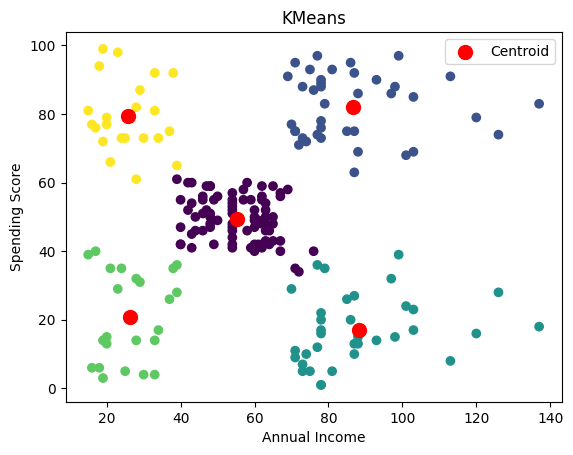

In [41]:
plt.title("KMeans")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.scatter(x["Annual Income (k$)"],x["Spending Score (1-100)"],c=label)

plt.scatter(cent[:,0],cent[:,1],s=100,color='red',label="Centroid")
plt.legend()